1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

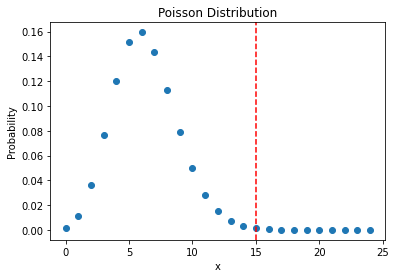

In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Define the mean and std of the distribution of the numbers of hurricanes
x0 = 15
mu = 6.3
sigma_mu = np.sqrt(mu)


# Plot the distribution
x = np.arange(0, 25)
plt.scatter(x, stats.poisson.pmf(x, mu))
plt.title('Poisson Distribution')
plt.xlabel('x')
plt.ylabel('Probability')
plt.axvline(x0, linestyle='--', color='red')
plt.show()

Z = 3.4661629670697414


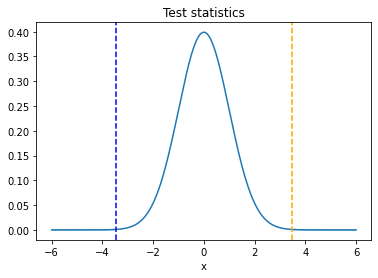

In [3]:
#Since x is Poisson distributed, the mean is normally distributed.
#So I can assume that Z is Gaussian with std = 1 and centered in 0

Z = (x0 - mu)/sigma_mu
print("Z =", Z)

# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics")
plt.xlabel("x")
plt.show()

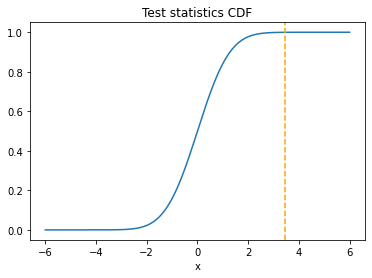

p-value = 0.00026397158691493505


In [5]:
# plot the Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)



#The obtained p-value is far smaller than the acceptance value 0.0015 (3 sigma level of acceptance)
#15 Hurricans in a year is statistically significant (should reject the null hypothesis)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 3.786997938137629


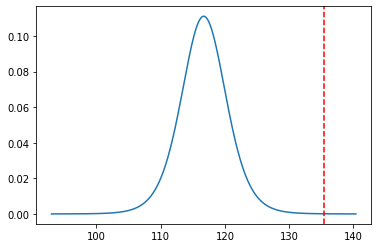

In [6]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Define the means and stds of the two distributions
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)
x1 = np.mean(pre)
x2 = np.mean(post)
sigma1 = np.std(pre, ddof = 1)
sigma2 = np.std(post, ddof = 1)

#Then define sigma and T for the t distribution
sigma = np.sqrt((sigma1**2 + sigma2**2)/2)
T = np.abs(x1 - x2) / (sigma * np.sqrt(2/n))
print("T =", T)

# Generate the plot
w = x2 - x1
x = np.linspace(x1 - w - 5, w + x1 + 5, 1000)
y = stats.t.pdf(x, loc=x1, scale=sigma / np.sqrt(n), df=n - 1)
plt.plot(x, y)
plt.axvline(x2, linestyle='--', color='red')

# Show the plot
plt.show()

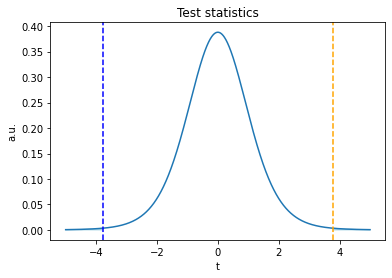

p-value = 0.004302464132864604


In [7]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(-T, n - 1) + (1. - stats.t.cdf(T, n - 1))
print("p-value =", pvalue)

#The change in blood pressures within the sample is statistically significant

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

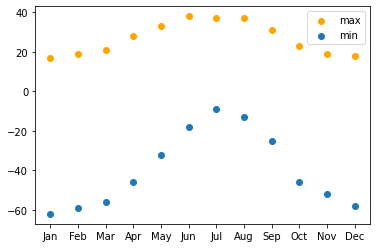

25.149620912466645 0.6013205350656631 17.377205588586705 -36.71257729807783


In [12]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

#Define the vectors for the two sets of temperatures
tmax = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
tmin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#plot the temperatures
months = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                   'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.scatter(months, tmax, color = 'orange', label='max')
plt.scatter(months, tmin, label='min')
plt.legend(loc='best')
plt.show()

#Define the Gaussian to fit the data
def f(x, a, mu, std, offset):
    return a*np.exp(-(x-mu)**2/(2*std**2)) + offset
#define a sin function to fit the data (periodic function since we are fitting temperatures)
def g(x, A, nu, c, d):
    return A * np.sin(nu *(x+c))+d

#perform the fit
para1, cov1 = optimize.curve_fit(g, np.arange(0,12), tmax, p0=[10, 1, 10, 27], full_output=False)
para2, cov2 = optimize.curve_fit(g, np.arange(0,12), tmin, p0=[10, 1, 7, -40], full_output=False)

time offset 1 = 18.15 +- 0.85
time offset 2 = 17.38 +- 0.89


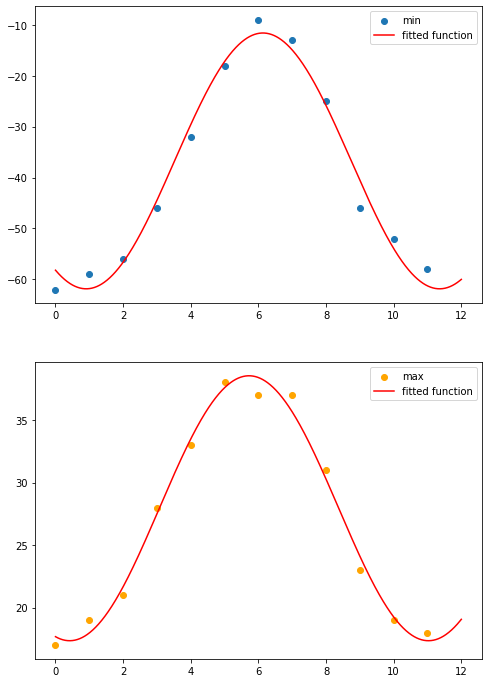

In [15]:
#Qua ho definito un lattice più fitto su cui plottare le funzioni ottenute,
#ma non so se devo fare così...
lattice = np.linspace(0,12,1000)

#plot the data together with the fitted functions
fig, ax = plt.subplots(2, 1, figsize = (8, 12))
ax[0].scatter(x, tmin, label='min')
ax[1].scatter(x, tmax, color='orange', label='max')
ax[0].plot(lattice, g(lattice, *para2), color='red', label='fitted function')
ax[1].plot(lattice, g(lattice, *para1), color='red', label='fitted function')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

#Check the two offsets
print("time offset 1 = %.2f +- %.2f" % (para1[2], np.sqrt(cov1[2,2])))
print("time offset 2 = %.2f +- %.2f" % (para2[2], np.sqrt(cov2[2,2])))


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

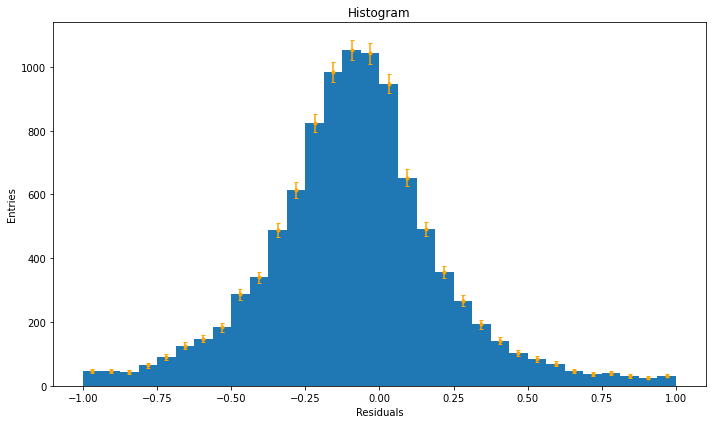

[  47.   47.   43.   64.   89.  126.  148.  183.  287.  340.  489.  613.
  824.  985. 1053. 1043.  948.  653.  493.  358.  267.  193.  142.  102.
   85.   69.   47.   38.   40.   31.   25.   32.]


In [19]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

#Read the pickle file and define a pandas Dataset
infile = open('data/residuals_261.pkl', 'rb')
data = pickle.load(infile)
infile.close()

df=pd.DataFrame.from_dict(data.flatten()[0],
                          orient='columns', dtype=None, columns=None)

#Plot the Histogram
fig = plt.figure(figsize=(10, 6)) 
h, bins, _ = plt.hist(df['residuals'], bins=32, range=(-1.0, 1.0), density=False, cumulative=False) 
ax = fig.axes[0]
ax.set_title('Histogram')
ax.set_xlabel('Residuals')
ax.set_ylabel('Entries')
fig.tight_layout()

#Determine bins centers to construct data points with error bars
bin_centers = (bins[:-1] + bins[1:]) / 2
ax.errorbar(x=bin_centers, y=h,
             yerr=np.sqrt(h), fmt='.', capsize=2, color='orange')

plt.show()

print(h)

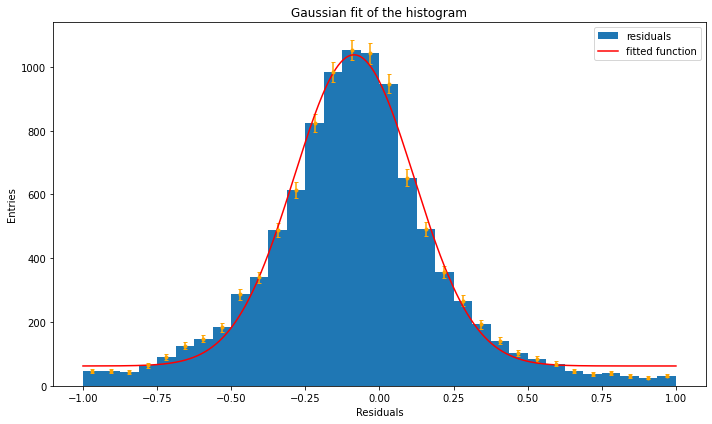

In [24]:
#Define the Gaussian to fit the data
def f(x, a, mu, std, offset):
    return a*np.exp(-(x-mu)**2/(2*std**2)) + offset

#perform the fit
para, cov = optimize.curve_fit(f, bin_centers, h, full_output=False)


lattice = np.linspace(-1,1,1000)

#plot the data together with the fitted functions
fig = plt.figure(figsize=(10, 6)) 
h, bins, _ = plt.hist(df['residuals'], bins=32, range=(-1.0, 1.0), 
                      density=False, cumulative=False, label='residuals') 
ax = fig.axes[0]
ax.set_title('Gaussian fit of the histogram')
ax.set_xlabel('Residuals')
ax.set_ylabel('Entries')
fig.tight_layout()
ax.errorbar(x=bin_centers, y=h,
             yerr=np.sqrt(h), fmt='.', capsize=2, color='orange')

ax.plot(lattice, f(lattice, *para), color='red', label='fitted function')
ax.legend(loc='best')

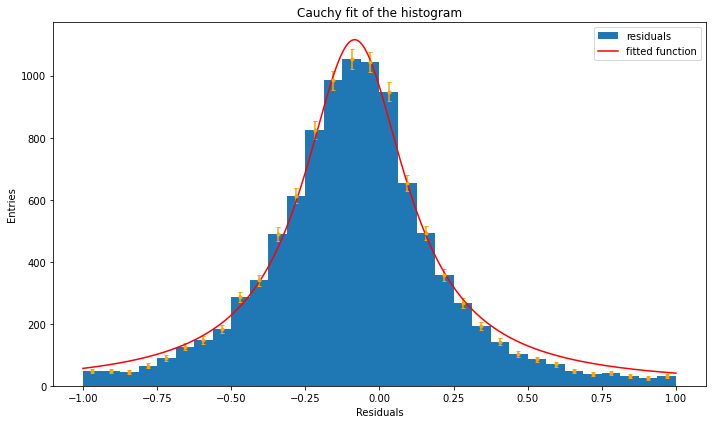

In [25]:
# Define the Cauchy distribution function
def cauchy_dist(x, a, loc, scale):
    return a * stats.cauchy.pdf(x, loc, scale) 

#perform the fit
popt, pcov = optimize.curve_fit(cauchy_dist, bin_centers, h, full_output=False)


lattice = np.linspace(-1,1,1000)

#plot the data together with the fitted functions
fig = plt.figure(figsize=(10, 6)) 
h, bins, _ = plt.hist(df['residuals'], bins=32, range=(-1.0, 1.0), 
                      density=False, cumulative=False, label='residuals') 
ax = fig.axes[0]
ax.set_title('Cauchy fit of the histogram')
ax.set_xlabel('Residuals')
ax.set_ylabel('Entries')
fig.tight_layout()
ax.errorbar(x=bin_centers, y=h,
             yerr=np.sqrt(h), fmt='.', capsize=2, color='orange')

ax.plot(lattice, cauchy_dist(lattice, *popt), color='red', label='fitted function')
ax.legend(loc='best')

In [22]:
#Chi2 using a gaussian fit
chi2 = np.sum((f(bin_centers, *para) - h)**2 / h)
print(chi2)

263.5812282697335


In [27]:
#Chi2 using cauchy distribution
cauchy_chi2 = np.sum((cauchy_dist(bin_centers, *popt) - h)**2 / h)
print(chi2)

257.2525824162965


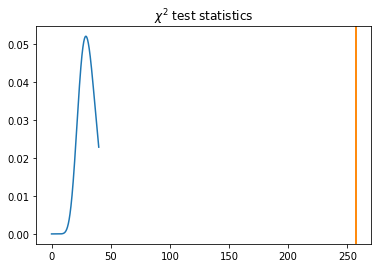

In [28]:
p = np.arange(0, 40, 0.1)
ts = stats.chi2.pdf(p, df=len(h) -1)
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics")
plt.axvline(chi2, color='red')
plt.axvline(cauchy_chi2, color='orange')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

a: -10.00 +- 0.12
b: 12.324 +- 0.012
c: 9.25 +- 0.09


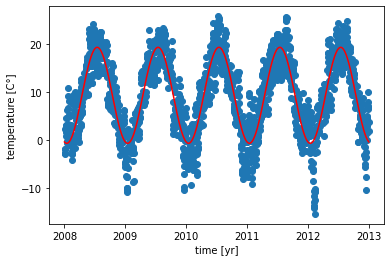

average temperature predicted:  9.253976707366382
avarage temperature measured:  9.254051149780702
max temperature predicted:  19.25123377460327
min temperature predicted:  -0.7432803598698978


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

#define the fitting function
def f(t, a, b, c):
    return a*np.cos(2 * np.pi * t + b) + c

#read the file and initialize the dataframe
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
data.columns = ["time", "temperature"]
data = data[data["time"] >= 2008]
data = data[data["time"] <= 2013]
data = data[abs(data["temperature"]) <= 50]
dt = data.groupby(data["time"]).mean()

#perform the fit
x = np.array(data["time"])
para, cov = optimize.curve_fit(f, x, data["temperature"], full_output=False)

#print the parameters found with their errors
print("a: %.2f +- %.2f" % (para[0], np.sqrt(cov[0,0])) )
print("b: %.3f +- %.3f" % (para[1], np.sqrt(cov[1,1])) )
print("c: %.2f +- %.2f" % (para[2], np.sqrt(cov[2,2])) )

#plot the function and the data
lattice = np.linspace(2008, 2013, 1000)
plt.scatter(x, data["temperature"])
plt.plot(lattice, f(lattice, *para), color = "r")
plt.xlabel("time [yr]")
plt.ylabel("temperature [C°]")
plt.show()

#define the antiderivative of f()
def F(t, a, b, c):
    return a / (2 * np.pi) * np.sin(2 * np.pi * t + b) + c * t

#compute and print predicted temperature value from the model used
avarage_p = (F(2013, *para) - F(2008, *para)) / 5
avarage_m = np.mean(data["temperature"])
max_p = f((np.pi - para[1]) / (2 * np.pi), *para)
min_p = f((2 * np.pi - para[1]) / (2 * np.pi), *para)

print("average temperature predicted: ", avarage_p)
print("avarage temperature measured: ", avarage_m)
print("max temperature predicted: ", max_p)
print("min temperature predicted: ", min_p)

#physical meaning of b parameter: the values start from the beginning of the year
#when the temperatures are low, b accounts for this arbitrariness

a: -10.00 +- 0.12
b: 0.999 +- 0.001
c: 24.33 +- 17.24
d: 9.24 +- 0.09


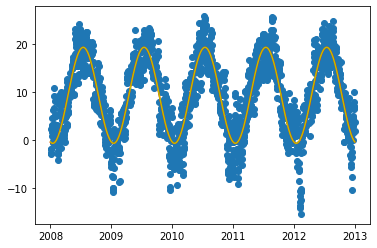

24672.377219719994 24678.63391611245
p-value: 0.497 , additional parameter necessary: NO


In [2]:
#define the fitting function
alpha = 0.05

def g(t, a, b, c, d):
    return a*np.cos(2 * np.pi * b * t + c) + d

#perform the fit
x = np.array(data["time"])
parag, covg = optimize.curve_fit(g, x, data["temperature"], full_output=False)

print("a: %.2f +- %.2f" % (parag[0], np.sqrt(covg[0,0])) )
print("b: %.3f +- %.3f" % (parag[1], np.sqrt(covg[1,1])) )
print("c: %.2f +- %.2f" % (parag[2], np.sqrt(covg[2,2])) )
print("d: %.2f +- %.2f" % (parag[3], np.sqrt(covg[3,3])) )

#plot the function and the data
lattice = np.linspace(2008, 2013, 1000)
plt.scatter(x, data["temperature"])
plt.plot(lattice, g(lattice, *parag), color = "r")
plt.plot(lattice, f(lattice, *para), color = "y")
plt.show()

#calcultate the RSS for the fit performed with g() and with f()
RSS_g = np.sum((data["temperature"] - g(x, *parag))**2)
RSS_f = np.sum((data["temperature"] - f(x, *para))**2)
print(RSS_g, RSS_f)
ndof_f = 3 - 1
ndof_g = 4 - 1
N = len(data["time"])

#calculate the F factor
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

pval_1_vs_2 = Ftest(RSS_f, RSS_g, ndof_f, ndof_g, N, verbose=True)